# Zona de Pruebas

Este notebook se usa para probar la funcionalidades y aprender como funciona realmente la librería.

In [1]:
from CraftingTable import CraftingTable
from ctgan import load_demo
real_data = load_demo()

Primero instanciamos un objeto de la clase CraftingTable.

*CraftingTable* nos sirve como recipiente para permitirnos cargar un modelo generativo de datos tabulares, ajustarlo a un conjunto de datos reales, generar datos sintéticos y evaluarlos, mientras mantenemos un registro de metadatos sobre las acciones que van sucediendo.

In [2]:
ct = CraftingTable()

Funciones Básicas:

- *create_model*: Primera función a ejecutar siempre que se instancia un objeto de la clase CraftingTable. Se le pasa por parámetro el nombre del modelo que se desea usar para generar los datos sintéticos y opcionalmente los hiperparámetros de este. Esta función inicializa una instancia nueva del modelo seleccionado.

- *fit*: Entrena el modelo cargado para que aprenda a generar datos sintéticos como los reales. Recibe por parámetro un DataFrame de datos reales y opcionalmente una lista con las columnas discretas, el número de épocas, y si se desea que se imprima la información del entrenamiento mientras sucede. Esta función modifica los metadatos del modelo.

- *sample*: Genera datos sintéticos. Recibe por parámetro el número de filas a generar y opcionalmente una columna y un valor para ésta fijados. Además, cuenta con un último parámetro solo aplicable al modelo "ctgan", que permite al usuario elegir si generar datos únicamente con el valor deseado en la columna deseada o que estos solo tengan una mayor probabilidad de ser generados. Esta función modifica los metadatos del modelo.

- *get_metadata*: Devuelve el registro de metadatos hasta el momento. Esta función no recibe nada por parámetro.

- *save*: Guarda el modelo. Opcionalmente, se puede seleccionar el nombre con el que el modelo se guardará.

- *load*: Carga un modelo de un archivo anteriormente guardado. Esta función recibe el path al archivo que contiene los datos del modelo. Es necesario haber ejecutado la función *create_model* con anterioridad para tener un modelo de ese tipo instanciado donde cargar los datos.

Funciones de Evaluación:

- *eval_stat*: Se evalúa la precisión de la generación de datos del modelo mediante tests estadísticos. Recibe por parámetro un DataFrame de datos reales con los que comparar y un string representando el nombre del test estadístico a realizar. Opcionalmente, se le puede pasar un DataFrame de datos sintéticos para comparar con los reales, en caso contrario, el modelo generará el mismo internamente estos datos.

- *eval_ml*: Se evalúa la eficacia de la generación de datos sintéticos para entrenar modelos de aprendizaje automático. Esta función recibe un DataFrame de datos reales, tres strings (nombre de la columna "target", tipo de tarea a realizar entre "regression"/"classification" y el nombre dentro del paquete Scikit-learn del modelo que se desea usar) y una lista con las métricas a devolver. Opcionalmente, se puede seleccionar también el tamaño de la partición de test y un DataFrame de datos sintéticos.

- *eval_plot*: Se generan gráficos para ver la similitud de las distribuciones entre datos reales y sintéticos. Esta función recibe un DataFrame de datos reales por parámetro, además de un string identificando el tipo de gráfico a realizar. Opcionalmente, se puede pasar un DataFrame de datos sintéticos por parámetro, además de una lista de las variables a graficar o incluso un número máximo de estas para los *pair plots*.

Empezamos creando el modelo. En este caso, al no pasarle los hiperparámetros, se usarán los predefinidos en el paper original de la CTGAN, aunque se pueden configurar a gusto de uno.

Actualmente, solo estan implementados dos modelos:

- CTGAN (Conditional Tabular Generative Adversarial Networks)
- TVAE (Tabular Variational AutoEncoder)

Ambos presentados en [este paper](https://arxiv.org/pdf/1907.00503).

In [3]:
ct.create_model("diffusion", {"d_layers":[128, 64, 32]})

Model loaded successfully!


Es aconsejable pasarle la lista de columnas con valores discretos de nuestro conjunto de datos, ya que así nos aseguramos un correcto funcionamiento del modelo. Además, ajustaremos la CTGAN usando 60 épocas y escogeremos que se imprima la evolución del entrenamiento poniendo verbose a *True*. 

⚠️⚠️⚠️**NO ES NECESARIO PONERLO A ENTRENAR YA QUE HAY YA UN MODELO PREENTRENADO**⚠️⚠️⚠️

In [4]:
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]
epochs=1000
verbose=True

In [5]:
ct.fit(data=real_data, discrete_columns=discrete_columns, epochs=epochs, verbose=verbose)

Step 500/1000 - MLoss: 0.0 | GLoss: 0.8638 | Total: 0.8638
Step 1000/1000 - MLoss: 0.0 | GLoss: 0.8584 | Total: 0.8584


,step,mloss,gloss,loss
0,100.0,0.0,0.9084,0.9084
1,200.0,0.0,0.8754,0.8754
2,300.0,0.0,0.8690,0.8690
3,400.0,0.0,0.8659,0.8659
4,500.0,0.0,0.8638,0.8638
5,600.0,0.0,0.8621,0.8621
6,700.0,0.0,0.8610,0.8610
7,800.0,0.0,0.8601,0.8601
8,900.0,0.0,0.8591,0.8591
9,1000.0,0.0,0.8584,0.8584


mloss debe ser la perdida de las categoricas

step parece ser los epochs aqui o ns mb el que

In [6]:
ct.sample(200)

Sample using DDIM.
Sample timestep    0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Local-gov,217592,HS-grad,11,Married-civ-spouse,Transport-moving,Wife,Other,Female,-3030,2888,-9,India,>50K
1,13,Private,273517,Assoc-voc,6,Married-civ-spouse,Armed-Forces,Unmarried,Black,Male,8583,-11,57,Holand-Netherlands,<=50K
2,13,Never-worked,1023194,Masters,11,Never-married,Tech-support,Wife,Black,Female,-3030,843,30,Philippines,<=50K
3,96,Without-pay,135645,10th,8,Separated,Craft-repair,Wife,Amer-Indian-Eskimo,Male,-200,-11,40,Yugoslavia,>50K
4,67,Federal-gov,714973,Prof-school,9,Divorced,Craft-repair,Wife,Black,Female,9528,2888,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13,Self-emp-not-inc,135645,Assoc-acdm,12,Married-spouse-absent,Priv-house-serv,Wife,White,Male,-200,843,36,France,>50K
196,67,Private,1023194,Bachelors,-2,Divorced,Handlers-cleaners,Husband,White,Female,-200,-11,84,?,<=50K
197,19,Local-gov,46489,7th-8th,12,Divorced,Farming-fishing,Unmarried,White,Male,200,11,126,Columbia,<=50K
198,31,State-gov,1023194,11th,6,Married-civ-spouse,Other-service,Husband,Black,Female,200,11,63,Scotland,<=50K


In [7]:
ct.eval_ml(real_data=real_data, target_name="sex", task="classification",
           ml="GaussianNB", metrics=["classification_report"])

Sample using DDIM.
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0


{'real': {'classification_report':               precision    recall  f1-score      support
  0              0.482085  0.686881  0.566543  3232.000000
  1              0.804028  0.635154  0.709683  6537.000000
  accuracy       0.652267  0.652267  0.652267     0.652267
  macro avg      0.643056  0.661017  0.638113  9769.000000
  weighted avg   0.697515  0.652267  0.662326  9769.000000},
 'fake': {'classification_report':               precision    recall  f1-score      support
  0              0.185293  0.137995  0.158184  3232.000000
  1              0.621570  0.700015  0.658465  6537.000000
  accuracy       0.514075  0.514075  0.514075     0.514075
  macro avg      0.403432  0.419005  0.408324  9769.000000
  weighted avg   0.477231  0.514075  0.492951  9769.000000}}

Sample using DDIM.
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0


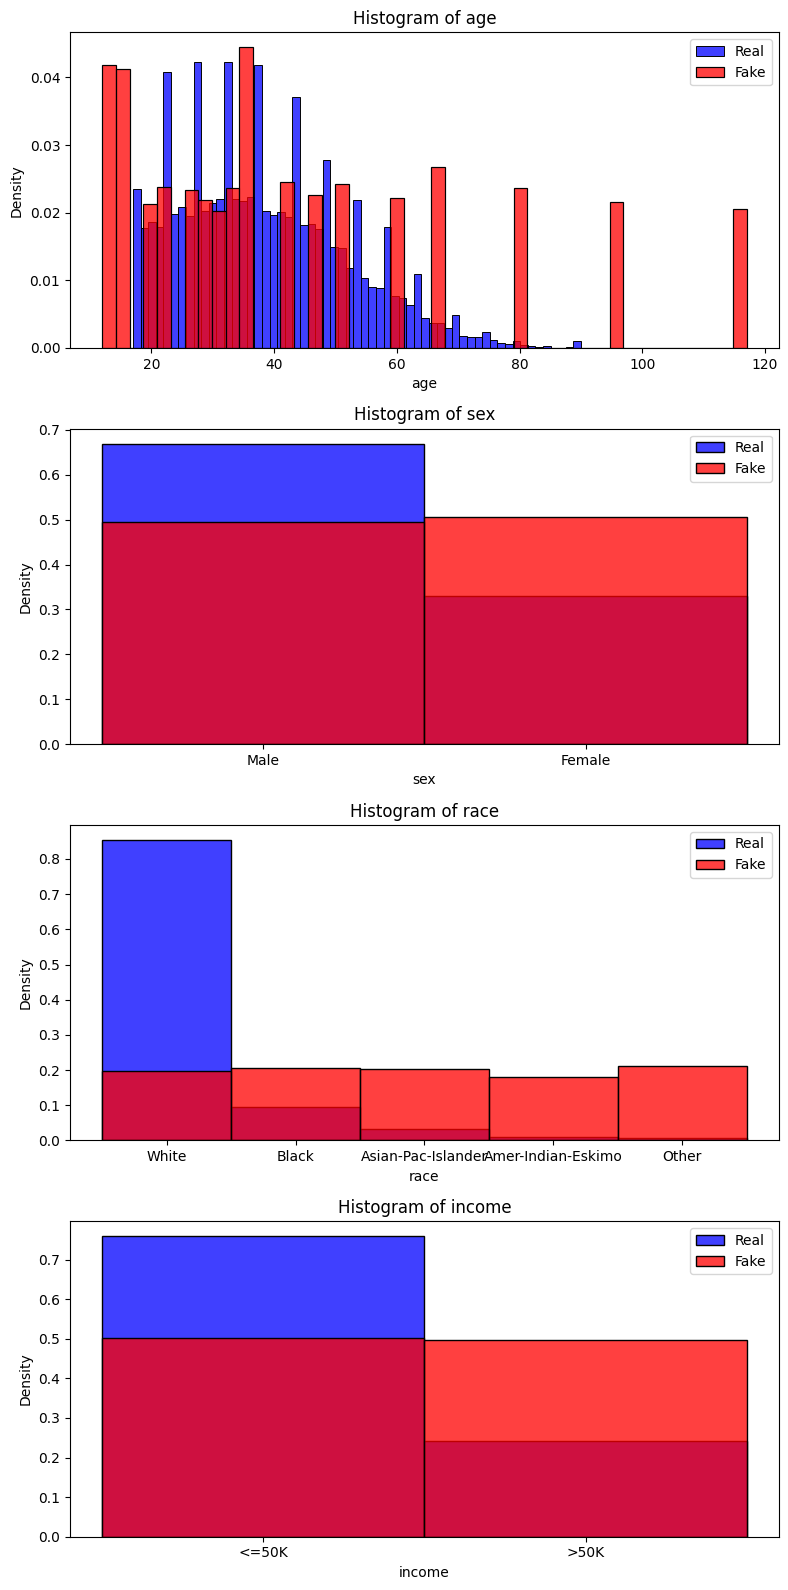

In [8]:
ct.eval_plot(real_data=real_data, plot_type='histogram', features=["age", "sex", "race", "income"])

In [9]:
ct.eval_stat(real_data, 'mahalanobis')

Sample using DDIM.
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0


{'distance': 142.2135969313671}

In [11]:
ct.get_metadata()['model']

{'model_type': 'diffusion',
 'hyperparameters': {'d_layers': [128, 64, 32],
  'device': device(type='cuda', index=0),
  'seed': 0},
 'fit_settings': {'times_fitted': 1,
  'fit_history': [{'Time_of_fit': '2025-03-31 22:17:24',
    'Fit_duration': '0:00:29',
    'Loss':      step  mloss   gloss    loss
    0   100.0    0.0  0.9084  0.9084
    1   200.0    0.0  0.8754  0.8754
    2   300.0    0.0  0.8690  0.8690
    3   400.0    0.0  0.8659  0.8659
    4   500.0    0.0  0.8638  0.8638
    5   600.0    0.0  0.8621  0.8621
    6   700.0    0.0  0.8610  0.8610
    7   800.0    0.0  0.8601  0.8601
    8   900.0    0.0  0.8591  0.8591
    9  1000.0    0.0  0.8584  0.8584},
        step  mloss   gloss    loss
   0   100.0    0.0  0.9084  0.9084
   1   200.0    0.0  0.8754  0.8754
   2   300.0    0.0  0.8690  0.8690
   3   400.0    0.0  0.8659  0.8659
   4   500.0    0.0  0.8638  0.8638
   5   600.0    0.0  0.8621  0.8621
   6   700.0    0.0  0.8610  0.8610
   7   800.0    0.0  0.8601  0.8601
  

In [12]:
ct.save("model_diffusion_pretrained.pt")

Model saved successfully!


In [4]:
ct.load("model_diffusion_pretrained.pt")

Model loaded successfully


In [3]:
ct.create_model("diffusion", {"d_layers":[128, 64, 32]})

Model loaded successfully!


In [5]:
res = ct.eval_stat(real_data=real_data[:1000], test="two_sample_classifier", classifier="GaussianNB")

Sample using DDIM.
Sample timestep    0


In [8]:
print(res["report"])

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       201
         1.0       0.99      0.98      0.99       199

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

